In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

# Giving months number value to make it easier to read for machine
df = pd.read_csv(io.BytesIO(uploaded['EnergyConsumption.csv.zip']),compression = 'zip')
df['TxnDate'] = pd.to_datetime(df['TxnDate'], format='%d-%b-%y')
month_name_to_number = {name: num for num, name in enumerate(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], start=1)}

# Updated DataFrame
print(df)


Saving EnergyConsumption.csv.zip to EnergyConsumption.csv.zip
        Srn    TxnDate   TxnTime  Consumption
0     76229 2022-01-01  16:55:52        1.010
1     76258 2022-01-01  21:45:29        0.908
2     76287 2022-01-01  12:24:52        0.926
3     76316 2022-01-01   4:07:36        0.928
4     76345 2022-01-01   6:52:25        0.916
...     ...        ...       ...          ...
3601   1744 2022-02-28  22:01:52        1.020
3602   1745 2022-02-28   8:54:15        0.948
3603   1746 2022-02-28   6:26:48        0.912
3604   1747 2022-02-28   3:21:12        1.064
3605   1748 2022-02-28  18:38:23        0.976

[3606 rows x 4 columns]


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("EnergyConsumption.csv.zip")

# Combine "TxnDate" and "TxnTime" into a single datetime column
df['DateTime'] = pd.to_datetime(df['TxnDate'] + ' ' + df['TxnTime'])

# Drop the individual "TxnDate" and "TxnTime" columns if needed
df = df.drop(['TxnDate', 'TxnTime'], axis=1)

# Display the updated DataFrame
print(df)

        Srn  Consumption            DateTime
0     76229        1.010 2022-01-01 16:55:52
1     76258        0.908 2022-01-01 21:45:29
2     76287        0.926 2022-01-01 12:24:52
3     76316        0.928 2022-01-01 04:07:36
4     76345        0.916 2022-01-01 06:52:25
...     ...          ...                 ...
3601   1744        1.020 2022-02-28 22:01:52
3602   1745        0.948 2022-02-28 08:54:15
3603   1746        0.912 2022-02-28 06:26:48
3604   1747        1.064 2022-02-28 03:21:12
3605   1748        0.976 2022-02-28 18:38:23

[3606 rows x 3 columns]


In [ ]:
print(df)

        Srn  Consumption            DateTime
0     76229        1.010 2022-01-01 16:55:52
1     76258        0.908 2022-01-01 21:45:29
2     76287        0.926 2022-01-01 12:24:52
3     76316        0.928 2022-01-01 04:07:36
4     76345        0.916 2022-01-01 06:52:25
...     ...          ...                 ...
3601   1744        1.020 2022-02-28 22:01:52
3602   1745        0.948 2022-02-28 08:54:15
3603   1746        0.912 2022-02-28 06:26:48
3604   1747        1.064 2022-02-28 03:21:12
3605   1748        0.976 2022-02-28 18:38:23

[3606 rows x 3 columns]


In [ ]:
df.describe()

,Srn,Consumption
count,3606.000000,3606.000000
mean,29432.384082,2.781508
std,40121.978666,2.961248
min,0.000000,0.000000
25%,451.000000,0.948000
50%,1173.500000,1.032000
75%,78986.750000,4.005500
max,98038.000000,27.284000


In [ ]:
print(min(df['DateTime']))
print(max(df['DateTime']))

2022-01-01 00:22:28
2022-02-28 23:50:27


In [ ]:
#Remove outliers
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("EnergyConsumption.csv.zip")

# Combine "TxnDate" and "TxnTime" into a single datetime column
df['DateTime'] = pd.to_datetime(df['TxnDate'] + ' ' + df['TxnTime'])

# Drop the individual "TxnDate" and "TxnTime" columns if needed
df = df.drop(['TxnDate', 'TxnTime'], axis=1)

# Calculate the IQR for the Consumption column
Q1 = df['Consumption'].quantile(0.25)
Q3 = df['Consumption'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Consumption'] >= lower_bound) & (df['Consumption'] <= upper_bound)]

# Display the updated DataFrame without outliers
print(df)

        Srn  Consumption            DateTime
0     76229        1.010 2022-01-01 16:55:52
1     76258        0.908 2022-01-01 21:45:29
2     76287        0.926 2022-01-01 12:24:52
3     76316        0.928 2022-01-01 04:07:36
4     76345        0.916 2022-01-01 06:52:25
...     ...          ...                 ...
3601   1744        1.020 2022-02-28 22:01:52
3602   1745        0.948 2022-02-28 08:54:15
3603   1746        0.912 2022-02-28 06:26:48
3604   1747        1.064 2022-02-28 03:21:12
3605   1748        0.976 2022-02-28 18:38:23

[3411 rows x 3 columns]


In [ ]:
energy_consumption = df.drop(columns = 'Srn')
energy_consumption = energy_consumption.rename(columns = {'DateTime': 'ds', 'Consumption' : 'y'})
energy_consumption.head()

,y,ds
0,1.010,2022-01-01 16:55:52
1,0.908,2022-01-01 21:45:29
2,0.926,2022-01-01 12:24:52
3,0.928,2022-01-01 04:07:36
4,0.916,2022-01-01 06:52:25


In [ ]:
print(energy_consumption)

          y                  ds
0     1.010 2022-01-01 16:55:52
1     0.908 2022-01-01 21:45:29
2     0.926 2022-01-01 12:24:52
3     0.928 2022-01-01 04:07:36
4     0.916 2022-01-01 06:52:25
...     ...                 ...
3601  1.020 2022-02-28 22:01:52
3602  0.948 2022-02-28 08:54:15
3603  0.912 2022-02-28 06:26:48
3604  1.064 2022-02-28 03:21:12
3605  0.976 2022-02-28 18:38:23

[3411 rows x 2 columns]


In [ ]:
energy_consumption.describe()

,y
count,3411.000000
mean,2.307424
std,2.108243
min,0.000000
25%,0.944000
50%,1.016000
75%,3.144000
max,8.584000


In [ ]:
# Assuming you want to predict consumption for the next 2 months
# 70% training - 30% testing - 73%

train = energy_consumption[energy_consumption['ds'] < '2022-02-11']
test = energy_consumption[energy_consumption['ds'] >= '2022-02-11']


In [ ]:

train_1 = train
test_1 = test

#create the Prophet model

model = Prophet()

model.fit(train_1)

# forecast for next 365 days

future = model.make_future_dataframe(periods = 2400, freq = 'h')
forecast = model.predict(future)

print(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz5bvbwek/cgo8i9bx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz5bvbwek/gpxf9kks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26762', 'data', 'file=/tmp/tmpz5bvbwek/cgo8i9bx.json', 'init=/tmp/tmpz5bvbwek/gpxf9kks.json', 'output', 'file=/tmp/tmpz5bvbwek/prophet_model71swlmxo/prophet_model-20231215172601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:26:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:26:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                      ds     trend  yhat_lower  yhat_upper  trend_lower  \
0    2022-01-01 00:22:28  3.463515    0.147412    4.554605     3.463515   
1    2022-01-01 00:42:33  3.462707   -0.381975    4.220271     3.462707   
2    2022-01-01 01:01:51  3.461930   -0.629954    3.982159     3.461930   
3    2022-01-01 01:41:48  3.460322   -0.981140    3.476786     3.460322   
4    2022-01-01 02:22:52  3.458669   -1.130716    3.494465     3.458669   
...                  ...       ...         ...         ...          ...   
4708 2022-05-21 19:42:05  1.328196  -26.755995   29.903168   -26.510411   
4709 2022-05-21 20:42:05  1.328099  -26.159904   30.158593   -26.535748   
4710 2022-05-21 21:42:05  1.328002  -26.807936   30.909589   -26.561084   
4711 2022-05-21 22:42:05  1.327905  -26.820549   30.070157   -26.586421   
4712 2022-05-21 23:42:05  1.327807  -27.090362   29.406829   -26.611758   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0        3.463515 

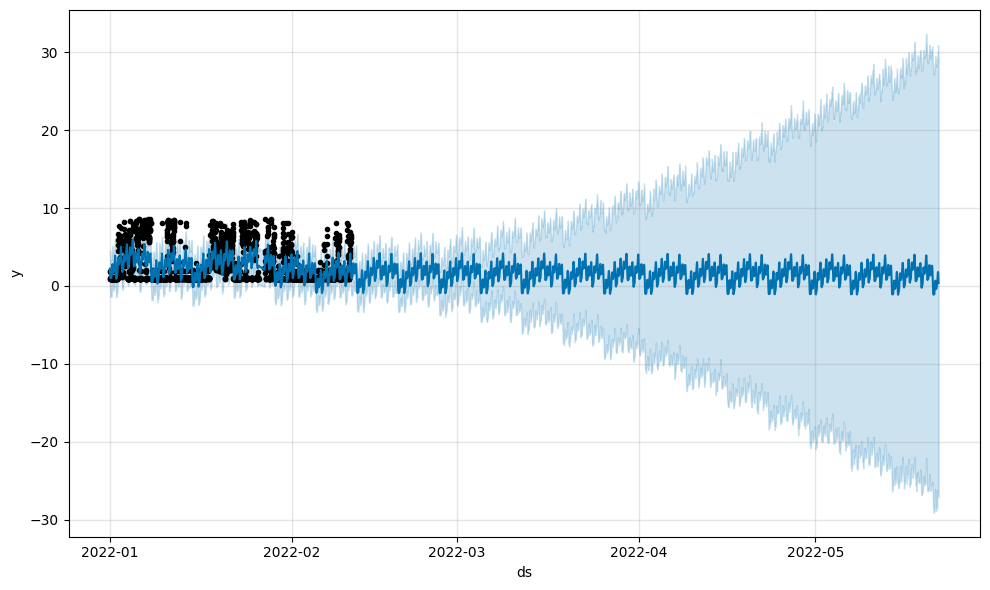

In [ ]:
fig = model.plot(forecast)

In [ ]:
forecast_1 = forecast[['ds', 'yhat']].copy()
forecast_1['ds'] = forecast_1['ds'].astype(str)

# Convert 'ds' to datetime64[ns] in test_1
test_1['ds'] = pd.to_datetime(test_1['ds'])

# Drop duplicates in both DataFrames based on 'ds'
test_1 = test_1[~test_1['ds'].duplicated()]
forecast_1 = forecast_1[~forecast_1['ds'].duplicated()]

# Concatenate DataFrames based on 'ds'
eval_df = pd.concat([test_1.set_index('ds'), forecast_1.set_index('ds')], axis=1, join='outer')

# Reset the index to have 'ds' as a regular column
eval_df.reset_index(inplace=False)

<ipython-input-32-104ed9758794>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['ds'] = pd.to_datetime(test_1['ds'])
<ipython-input-32-104ed9758794>:15: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  eval_df.reset_index(inplace=False)


,ds,y,yhat
0,2022-02-11 18:56:16,4.962,NaN
1,2022-02-11 11:13:28,2.188,NaN
2,2022-02-11 02:54:38,0.944,NaN
3,2022-02-11 07:33:27,0.984,NaN
4,2022-02-11 21:49:52,5.096,NaN
...,...,...,...
5783,2022-05-21 19:42:05,NaN,1.114839
5784,2022-05-21 20:42:05,NaN,1.654487
5785,2022-05-21 21:42:05,NaN,1.796546
5786,2022-05-21 22:42:05,NaN,1.318509


In [ ]:
eval_df['y'].fillna(eval_df['y'].mean(), inplace=True)
eval_df['yhat'].fillna(eval_df['yhat'].mean(), inplace=True)

In [ ]:
eval_df['abs_error'] = abs(eval_df['y'] - eval_df['yhat'])
total_y = sum(eval_df['y'])
total_error = sum(eval_df['abs_error'])
forecast_acc = 1-(total_error/total_y)
print(forecast_acc)

0.46256232229789496


In [ ]:
eval_df['abs_percentage_error'] = abs(eval_df['y'] - eval_df['yhat']) / abs(eval_df['y'])
mape = 100 * eval_df['abs_percentage_error'].mean()
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 56.19%
